# **Importing Necessary Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading Dataset**

In [2]:
df = pd.read_csv(r'/kaggle/input/indian-restaurants-2023/restaurants.csv')
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


# **Checking null values and based on null values need to clean the dataset accordingly**

In [3]:
df.isnull().sum()

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64

# **Distribution of Ratings**

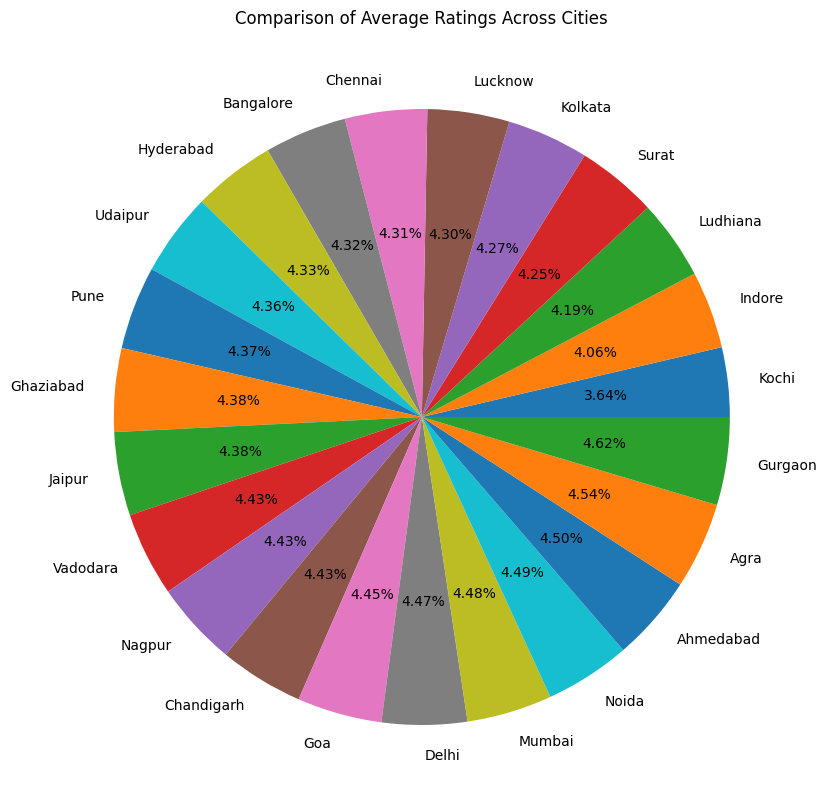

In [4]:
df_rating = df.groupby('City')['Rating'].mean().reset_index()
df_rating = df_rating.sort_values('Rating')
plt.figure(figsize=(16,10))
plt.pie(df_rating['Rating'], labels=df_rating['City'], autopct='%1.2f%%')
plt.title('Comparison of Average Ratings Across Cities')
plt.show()

# **Average Cost of Restaurants Across Cities**

In [5]:
average_cost = df.groupby(['City'])['Cost'].mean().reset_index()
fig = px.bar(average_cost, x='City', y='Cost', labels={'City': 'City', 'Name': 'Average Cost of Restaurants'},
             title='Average Cost in Each City', color = 'City')
fig.show()

# **Categorizing Cities based on Count of Restaurants**

Text(0, 0.5, 'Count of Restaurants')

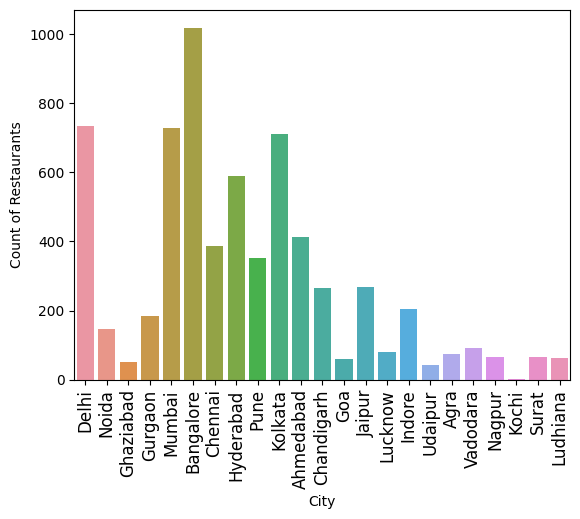

In [6]:
plt.xticks(rotation=90, fontsize=12)
sns.countplot(x= df['City'], data=df)
plt.ylabel('Count of Restaurants')

# **Average Voting Across Cities**

In [7]:
avg_vote = df.groupby(['City'])['Votes'].mean().reset_index()
fig = px.bar(avg_vote, x='City', y='Votes', labels={'City': 'City', 'Name': 'Average Number of Votes of Restaurants'},
             title='Average Votes in Each City', color = 'City')
fig.show()

# **Categorizing Cities according to Number of Votes**

In [8]:
max_votes = df.groupby(['City'])['Votes'].sum().reset_index()
fig = px.bar(max_votes, x='City', y='Votes', labels={'City': 'City', 'Name': 'Number of Votes of Restaurants'},
             title='Top Votes in Each City', color = 'City')
fig.show()

# **Top Cuisines in India**

In [9]:
df_cuisine = df.groupby(['City', 'Cuisine'])['Name'].count().reset_index()

# # get the top cuisine for each city
df_top_cuisine = df_cuisine.loc[df_cuisine.groupby('City')['Name'].idxmax()]

# create the bar chart
fig = px.bar(df_top_cuisine, x='City', y='Name', color='Cuisine',
             labels={'City': 'City', 'Name': 'Number of Restaurants'},
             title='Top Cuisine in Each City')
fig.show()